<h1 align=center><font size = 5>Хмара слів</font></h1>

Хмари слів (також знані як текстові хмари або хмари тегів) мають досить простий алгоритм роботи: чим частіше у джерелі текстових даних (текстах, виступах, блогах, тощо) зустрічаються специфічні слова, тим більшим шрифтом ці слова будуть виділені у текстовій хмарі.

Для цієї роботи у Python є відповідна бібліотека - `word_cloud`, розроблена **Andreas Mueller**. Більше можна прочитати за [посиланням](https://github.com/amueller/word_cloud/). Давайте використаємо її.

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

# опціонально: стиль графіків ggplot (Ви можете загуглити "plt.style.available" та обрати стиль, який
#більше подобається
mpl.style.use('ggplot') 

In [2]:
# імпортуємо об'єкт WordCloud та англомовний сет STOPWORDS
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


Хмари слів використовується для проведення аналізу високого рівня та візуалізації текстових даних. Тепер давайте відійдемо від Канади та попрацюємо з текстом. Спробуємо проаналізувати *Alice's Adventures in Wonderland*, написану **Lewis Carroll**.

In [3]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [4]:
# Відкрийте файл та зчитайте його вмість у змінну alice_novel
alice_novel = open('alice_novel.txt', 'r')
alice_novel = alice_novel.read()

Тепер давайте підготуємо перелік стопслів, взятих з `word_cloud`. Використаємо функцію *set* для того, щоб прибрати повтори. (Пам'ятаєте, що саме робить ця функція?)

In [5]:
stopwords = set(STOPWORDS)

Створіть об'єкт WordCloud та згенеруйте хмару слів. Для економії часу при навчанні, давайте використаємо лише перші 2000 слів новели.

In [6]:
# створюємо екземпляр об'єкта WordCloud
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# згенеруйте хмару слів
alice_wc.generate(alice_novel)

Чудово! Хмара слів створена, тепер слід її візуалізувати.

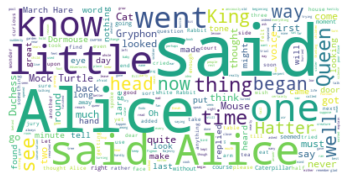

In [7]:
# візуалізуємо хмару слів
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Цікаво! Таким чином, у перших 2000 слів найбільш поширеними є **Alice**, **said**, **little**, **Queen** і т.д. Давайте збільшимо хмару, щоб ми могли побачити менш часті слова краще. 

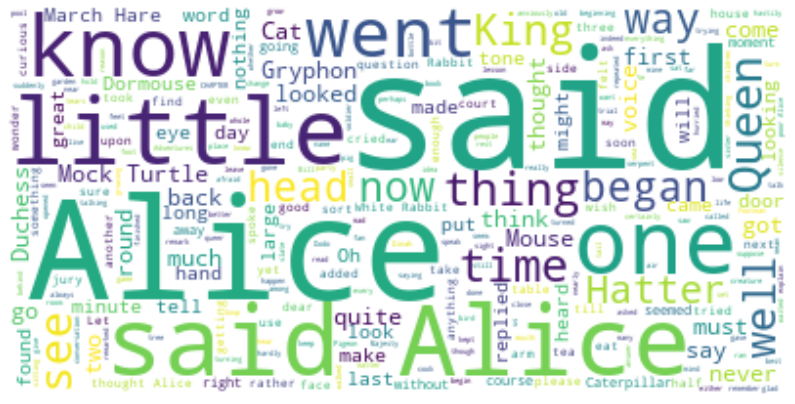

In [8]:
fig = plt.figure()
fig.set_figwidth(14) # встановити ширину рисунку
fig.set_figheight(18) # встановити висоту рисунку
# Пограйтесь з розмірами, визначте які параметри будь для вас максимально зручними.

# візуалізуйте хмару
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Так набагато краще! Однак, слово **said** не є інформативним для нас. Давайте додамо його у перелік стоп-слів та сформуємо словохмару наново.

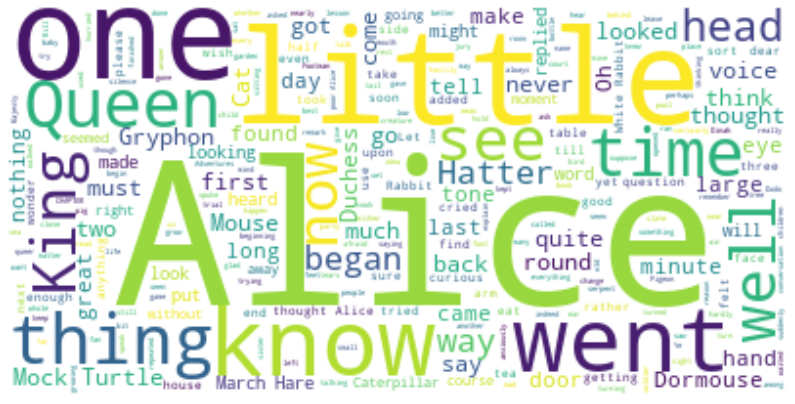

In [9]:
stopwords.add('said') # додаємо нове стоп-слово

# створюємо словохмару наново
alice_wc.generate(alice_novel)

# візуалізуйте хмару
fig = plt.figure()
fig.set_figwidth(14) # встановіть ширину
fig.set_figheight(18) # встановіть висоту

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Прекрасно! І виглядає цікаво! Іншою цікавинкою бібліотеки `word_cloud` є те, що можна вставити словохмару у рисунок будь-якої форми. Давайте використаємо маску Аліси та її кролика.(*alice_mask.png*).

In [10]:
import numpy as np
from PIL import Image
 
# зберігаємо маску у alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


Давайте поглянемо як виглядає маска.

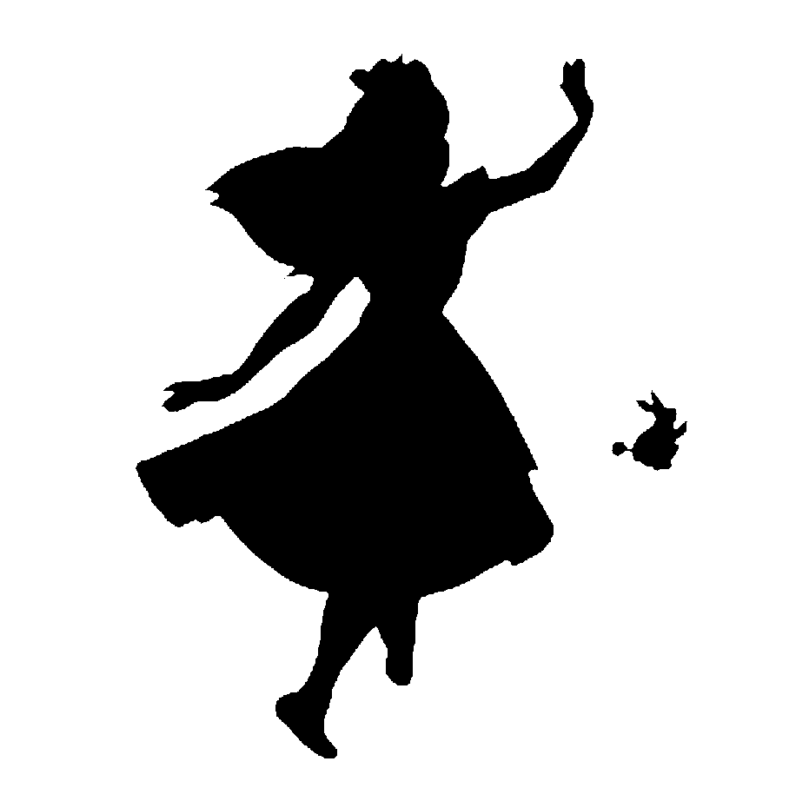

In [11]:
fig = plt.figure()
fig.set_figwidth(14) # встановіть ширину
fig.set_figheight(18) # встановіть висоту

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

По суті, процес імплементації словохмари у будь-яку маску через бібліотеку `word_cloud` є типовим. Давайте використаємо нову маску на словохмару з 2000 слів.

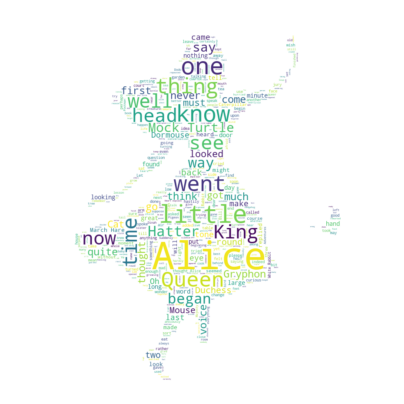

In [12]:
# створюємо екземпляр об'єкта WordCloud
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# генеруємо словохмару
alice_wc.generate(alice_novel)

# Візуалізуємо словохмару
fig = plt.figure()
fig.set_figwidth(7) # встановлюємо ширину
fig.set_figheight(9) # встановлюємо висоту

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()